In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

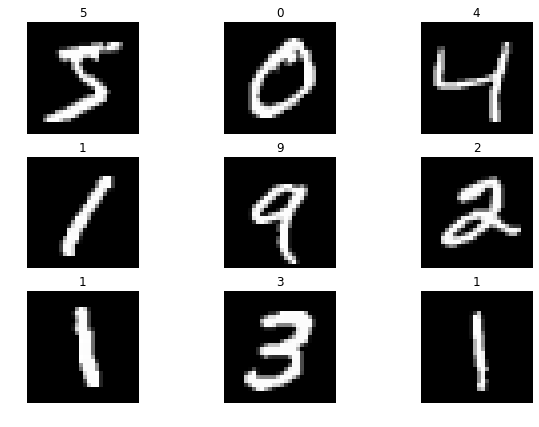

In [2]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')

In [3]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 ** 2)))

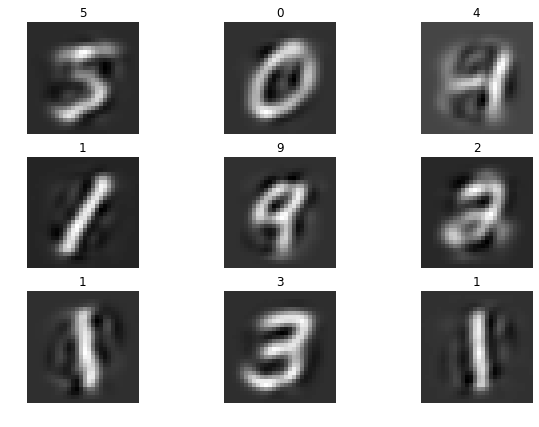

In [4]:
mnist_30comp = model_pca.transform(mnist['images'].reshape((-1, 28 ** 2)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist_30comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')

In [5]:
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=1)

In [6]:
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.044s...
[t-SNE] Computed neighbors for 10000 samples in 6.850s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 285.862155
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.216644
[t-SNE] KL divergence after 1000 iterations: 1.695150


In [7]:
mnist_tsne.shape

(10000, 2)

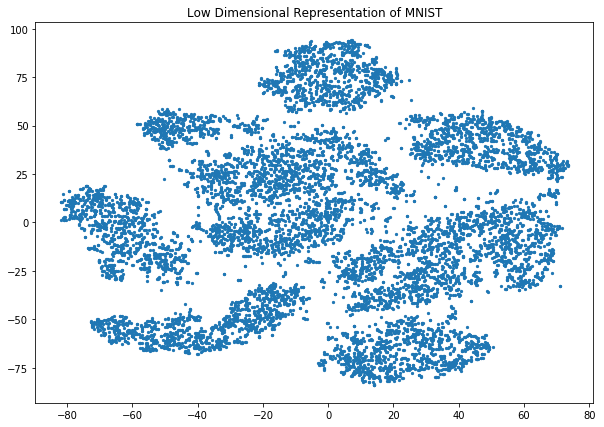

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:,0], mnist_tsne[:,1], s=5)
plt.title('Low Dimensional Representation of MNIST');

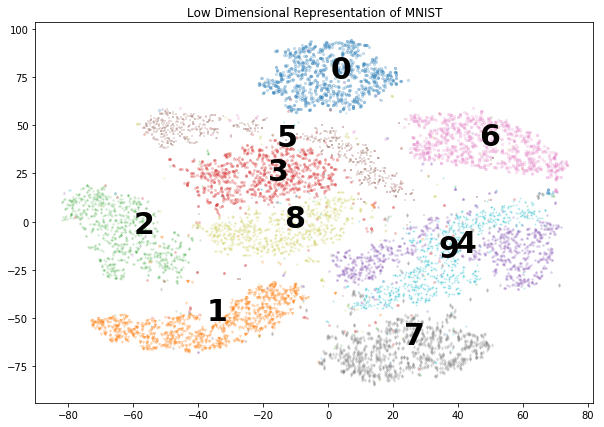

In [9]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})

In [10]:
threes = np.where(mnist['labels'] == 3)[0]
threes

array([   7,   10,   12, ..., 9974, 9977, 9991], dtype=int64)

In [11]:
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:,0]< 0)[0]
far_threes

array([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   25,   26,   28,   29,   30,   31,   32,   33,   34,   35,
         36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,
         47,   48,   49,   51,   52,   53,   54,   55,   56,   57,   58,
         59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
         70,   71,   72,   73,   74,   75,   76,   77,   78,   79,   80,
         81,   82,   83,   84,   85,   86,   87,   89,   90,   91,   92,
         93,   94,   95,   96,   97,   98,   99,  100,  101,  102,  103,
        104,  105,  106,  107,  109,  110,  111,  112,  113,  114,  115,
        116,  120,  121,  122,  123,  124,  125,  126,  127,  128,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  143,  144,  145,  146,  147,  148,  149,  150,  151,
        152,  153,  154,  156,  157,  158,  159,  1

In [12]:
tsne_threes[far_threes]

array([[-30.642307 ,  12.245307 ],
       [-24.004894 ,  25.611006 ],
       [ -6.4941206,  28.180338 ],
       ...,
       [-39.03908  ,  25.073717 ],
       [-35.6635   ,  21.366177 ],
       [-26.469347 ,  28.933937 ]], dtype=float32)

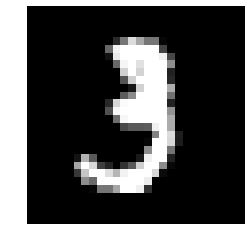

In [13]:
plt.imshow(mnist['images'][10], cmap='gray')
plt.axis('off');